In [1]:
import sklearn
sklearn.__version__

'1.0.2'

# 1.Simple Linear Regression
# 단순 선형 회귀
# 공부시간에 따른 시험 점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset =pd.read_csv("LinearRegressionData.csv") # csv파일 불러오기

In [4]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [10]:
X = dataset.iloc[:, :-1].values #처음부터 마지막 컬럼 직전까지의 데이터[독립변수-원인]
Y = dataset.iloc[:, -1].values #마지막 컬럼 데이터 [종속변수 - 경과]

In [11]:
X,Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체생성
reg.fit(X,Y) #fit은 학습을 시킨다는 뜻(모델생성)

LinearRegression()

In [13]:
Y_pred = reg.predict(X)#X의 대한 예측 값
Y_pred
# 5.000.... 0.5 시간 공부했을 떄 나올 예측 점수

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

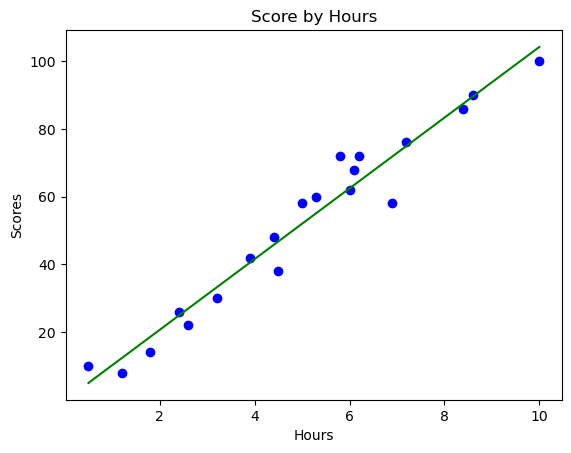

In [14]:
#데이터 시각화
plt.scatter(X,Y,color='blue') #산점도
plt.plot(X,Y_pred,color='green')#선그래프
plt.title('Score by Hours') #제목
plt.xlabel('Hours') #X축 제목
plt.ylabel('Scores') #Y축 제목
plt.show()

In [15]:
print('9시간, 8시간 공부했을 때 각각의 예상점수: ',reg.predict([[9],[8]]))

9시간, 8시간 공부했을 때 각각의 예상점수:  [93.77478776 83.33109082]


In [16]:
reg.coef_ #기울기 [m]

array([10.44369694])

In [17]:
reg.intercept_ #y절편

-0.21848470286721522

# 데이터 세트 분리

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
dataset =pd.read_csv("LinearRegressionData.csv")
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [20]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)#훈련세트 80, 테스트세트20

In [22]:
X, len(X) #전체데이터,X개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [23]:
X_train, len(X_train)#훈련데이터 X 개수
#값이 순서대로가 아닌 이유 위 코드에서 x_state 를 0으로 했기 때문 다른 값을 주면 또 달라짐.

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [24]:
X_test, len(X_test) #테스트세트, X개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [25]:
Y,len(Y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [26]:
Y_train, len(Y_train) #훈련세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [27]:
Y_test, len(Y_test)#테스트 세트 Y

(array([ 90,   8, 100,  38], dtype=int64), 4)

# 분리된 데이터를 통한 모델링

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [29]:
reg.fit(X_train,Y_train) #훈련세트로 학습 #fit은 학습을 시킨다는 뜻(모델생성)

LinearRegression()

 # 데이터시각화(훈련 세트)

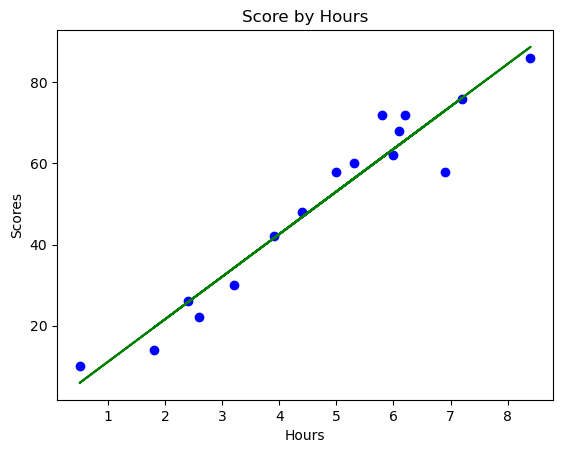

In [30]:
#데이터 시각화
plt.scatter(X_train,Y_train,color='blue') #산점도
plt.plot(X_train,reg.predict(X_train),color='green')#선그래프
plt.title('Score by Hours') #제목
plt.xlabel('Hours') #X축 제목
plt.ylabel('Scores') #Y축 제목
plt.show()

# 데이터시각화(테스트 세트)

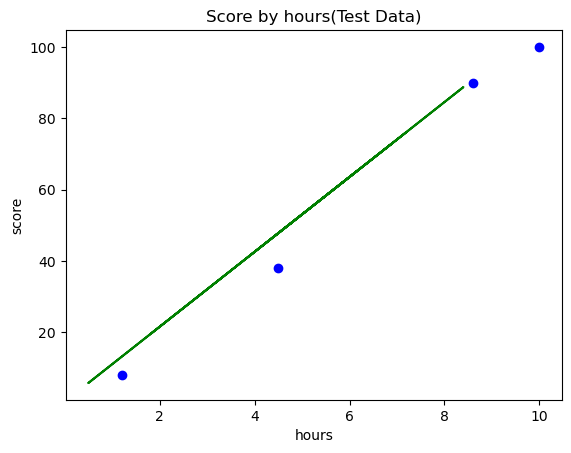

In [31]:
#데이터 시각화
plt.scatter(X_test,Y_test,color = 'blue')#산점도
plt.plot(X_train, reg.predict(X_train),color='green')#선 그래프  선그래프는 train인 이유-> 위에 모델에서 train으로 만들었기때문에.
plt.title("Score by hours(Test Data)") #제목
plt.xlabel('hours')# x축 제목
plt.ylabel('score')# y축 제목
plt.show()

In [32]:
reg.coef_

array([10.49161294])

In [33]:
reg.intercept_

0.6115562905169796

# 모델 평가

In [34]:
reg.score(X_test,Y_test) # 테스트 세트를 통한 모델 평가
#97점의 높은 정확도

0.9727616474310156

In [35]:
reg.score(X_train,Y_train) #훈련 세트를 통한 모델 평가

0.9356663661221668

# 경사하강법 (Gradient Descent)

### max_iter = 훈련세트 반복 횟수(Epoch횟수)
### eta0 = 학습률 (learning rate)

In [67]:
from sklearn.linear_model import SGDRegressor #SGD: Stochasticc Gradient Descent 확률적 경사 하강법

#sr = SGDRegressor(max_iter=200,eta0=1e-4,random_state=0,verbose=1) #()안에 횟수를 정하는 코드
sr = SGDRegressor() #()안에 횟수를 정하는 코드
sr.fit(X_train,Y_train)

SGDRegressor()

In [68]:
#지수표기법 
#1e-3 : 0.001(10^-3)
#1e-4 : 0.0001(10^-4)
#1e+3 : 1000(10^3)
#1e+4 : 10000(10^4)

#verbose를 추가하면 반복할때마다의 정보가 나옴.
#verbose를 없애면 그냥 마지막 결과값만 나옴.

# 에포크를 100으로하고, 학습률을 10000으로하면 수렴이 100번 할 동안 수렴이 제대로 안되어서 경고뜸.
# 그래프도 이상하게 나옴. 

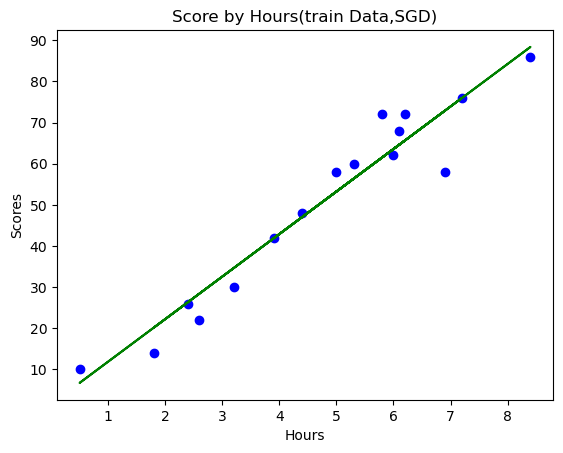

In [69]:
#데이터 시각화
plt.scatter(X_train,Y_train,color='blue') #산점도
plt.plot(X_train,sr.predict(X_train),color='green')#선그래프
plt.title('Score by Hours(train Data,SGD)') #제목
plt.xlabel('Hours') #X축 제목
plt.ylabel('Scores') #Y축 제목
plt.show()

In [70]:
sr.coef_, sr.intercept_

(array([10.33944533]), array([1.53258987]))

In [71]:
sr.score(X_test,Y_test) #테스트 세트를 통한 모델 평가

0.9716804919809965

In [72]:
sr.score(X_train,Y_train) #훈련 세트를 통한 모델 평가

0.9353921393640063